### Import the necessary libraries

In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Description
'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

 ### Load the data

In [115]:
fuel_data = pd.read_csv('./Data/fuel_ferc1.csv')
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


### Exploratory Data Analysis

In [116]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [117]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [118]:
print(f'The Fuel_data dataset has {fuel_data.shape[0]} rows and {fuel_data.shape[1]} columns')

The Fuel_data dataset has 29523 rows and 11 columns


In [119]:
fuel_data.duplicated().any()

False

In [120]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [121]:
for col in fuel_data.columns:
    if fuel_data[col].dtypes== 'O':
        print(f'Feature {col} has {fuel_data[col].nunique()} unique variables')
        print(' ')

Feature record_id has 29523 unique variables
 
Feature plant_name_ferc1 has 2315 unique variables
 
Feature fuel_type_code_pudl has 6 unique variables
 
Feature fuel_unit has 9 unique variables
 


In [122]:
cat_features = fuel_data.select_dtypes(include = [np.object])
num_features = fuel_data.select_dtypes(include = [np.number])
cat_cols = cat_features.columns
num_cols = num_features.columns
for col in cat_cols:
    if cat_features[col].nunique() <= 2500:
        print(col)
        print(cat_features[col].value_counts().sort_values(ascending = False))
        print('-'*100)

plant_name_ferc1
big stone               156
four corners            151
riverside               133
coyote                  121
louisa                  119
                       ... 
w. c. beckjord 1 - 5      1
gloucester                1
west phoenix 1-3          1
h. o. clarke              1
sunrise (3)               1
Name: plant_name_ferc1, Length: 2315, dtype: int64
----------------------------------------------------------------------------------------------------
fuel_type_code_pudl
gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64
----------------------------------------------------------------------------------------------------
fuel_unit
mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64
----------------------------------------------------------------------------

In [123]:
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [124]:
fuel_data.corr()['fuel_cost_per_unit_delivered'].sort_values(ascending = False)

fuel_cost_per_unit_delivered    1.000000
fuel_cost_per_unit_burned       0.011007
fuel_cost_per_mmbtu            -0.000109
fuel_qty_burned                -0.003551
fuel_mmbtu_per_unit            -0.009039
report_year                    -0.014043
utility_id_ferc1               -0.016414
Name: fuel_cost_per_unit_delivered, dtype: float64

### Correlation Heatmap

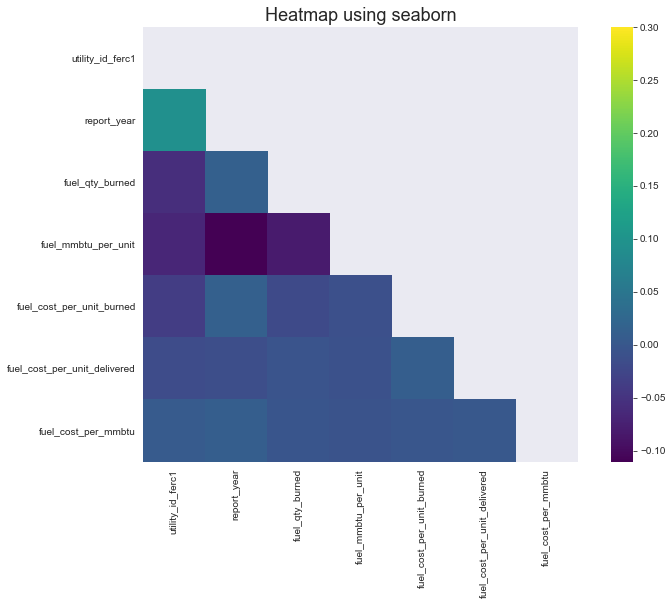

In [125]:
corr = fuel_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,8))

# plot the data using seaborn
ax = sns.heatmap(corr, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 cmap = "viridis")
# set the title for the figure
ax.set_title("Heatmap using seaborn", fontsize = 18 );

In [126]:
fuel_data[['fuel_type_code_pudl','fuel_qty_burned','fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered']].groupby('fuel_type_code_pudl').agg([np.mean, 'min', 'max'])

fuel_qty_burned                     \
                               mean   min          max   
fuel_type_code_pudl                                      
coal                   1.903473e+06   3.0  555894250.0   
gas                    4.843183e+06   1.0  166385450.0   
nuclear                5.454838e+06   1.0   50038564.0   
oil                    6.311677e+04   1.0   46460148.0   
other                  2.948137e+06  25.0  417297683.0   
waste                  1.171914e+05   7.0     799499.0   

                    fuel_cost_per_unit_burned                      \
                                         mean     min         max   
fuel_type_code_pudl                                                 
coal                                67.421830    0.00   44033.320   
gas                                 13.659397    0.00   10490.000   
nuclear                           4955.157002    0.00   69785.215   
oil                                168.877086    0.00  139358.000   
other                               18.253856 -119.04     134.547   
waste                               19.518122 -276.08     132.291   

                    fuel_cost_per_unit_delivered                        
                                            mean      min          max  
fuel_type_code_pudl                                                     
coal                                  116.951141  -40.725   270604.000  
gas                                    12.095172    0.000    10490.000  
nuclear                             28616.915039    0.000  7964521.000  
oil                                   313.907691 -874.937   730166.000  
other                                  16.871485 -118.340      132.209  
waste                                  18.413052 -174.670      121.020

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='fuel_cost_per_unit_burned'>

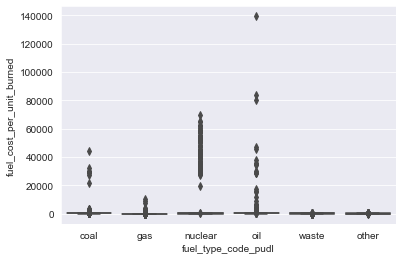

In [127]:
sns.boxplot(x="fuel_type_code_pudl", y="fuel_cost_per_unit_burned", data=fuel_data,palette='rainbow')

In [128]:
fuel_data['report_year'].value_counts().sort_values(ascending = False)

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [129]:
fuel_data[['report_year','fuel_type_code_pudl','fuel_qty_burned','fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered']].groupby(['fuel_type_code_pudl', 'report_year']).agg([np.mean, 'min', 'max'])

fuel_qty_burned                       \
                                           mean     min          max   
fuel_type_code_pudl report_year                                        
coal                1994           1.509912e+06  1586.0   35063261.0   
                    1995           2.647153e+06   208.0  555894250.0   
                    1996           1.621465e+06  4988.0   13320972.0   
                    1997           1.958999e+06   744.0   66450503.0   
                    1998           2.084013e+06   311.0   59721306.0   
...                                         ...     ...          ...   
waste               2014           2.004032e+05  1889.0     538837.0   
                    2015           2.076373e+05  1462.0     495602.0   
                    2016           2.224943e+05   207.0     547411.0   
                    2017           2.356153e+05  1372.0     508426.0   
                    2018           2.060233e+05   300.0     559442.0   

                                fuel_cost_per_unit_burned                     \
                                                     mean     min        max   
fuel_type_code_pudl report_year                                                
coal                1994                        31.546467   9.702     60.810   
                    1995                        30.677442   6.430     78.870   
                    1996                        29.454299   8.340     60.280   
                    1997                       104.897309   1.413  31839.000   
                    1998                        27.616234   1.412     54.661   
...                                                   ...     ...        ...   
waste               2014                        32.866333  11.500     48.570   
                    2015                        34.959444   1.643     82.479   
                    2016                        31.710529  -3.946     81.997   
                    2017                        30.138600   0.510     81.993   
                    2018                        41.310750   7.230    132.291   

                                fuel_cost_per_unit_delivered         \
                                                        mean    min   
fuel_type_code_pudl report_year                                       
coal                1994                          124.663939  0.000   
                    1995                           28.850834  0.000   
                    1996                           28.045432  0.000   
                    1997                           27.119043  0.000   
                    1998                          716.015659  0.000   
...                                                      ...    ...   
waste               2014                           30.294056  2.019   
                    2015                           32.854444  1.643   
                    2016                           29.661471 -3.946   
                    2017                           27.854533  0.510   
                    2018                           32.171813  2.138   

                                             
                                        max  
fuel_type_code_pudl report_year              
coal                1994          45115.000  
                    1995             60.270  
                    1996             60.070  
                    1997             55.570  
                    1998         270604.000  
...                                     ...  
waste               2014             48.550  
                    2015             82.452  
                    2016             81.999  
                    2017             82.012  
                    2018             81.953  

[148 rows x 9 columns]

In [130]:
# Skewness of the numerical data
# Kurtosis of numerical data
skew = []
kurt = []
symmetry = []
normal_data = []
skewed_num_data = []
for col in num_features.columns:
    x=num_features[col].skew()
    y = num_features[col].kurt()
    skew.append(x)
    kurt.append(y)
    if x < -0.5:
        symmetry.append('Left Skewed')
        skewed_num_data.append(col)
    elif x > 0.5:
        symmetry.append('Right Skewed')
        skewed_num_data.append(col)
    else:
        symmetry.append('Approximate Symmetry')
        normal_data.append(col)
pd.DataFrame({'Skew':skew, 'Kurtosis': kurt, 'Symmetry':symmetry}, index = num_cols )

,Skew,Kurtosis,Symmetry
utility_id_ferc1,0.605070,1.088432,Right Skewed
report_year,0.006953,-1.145656,Approximate Symmetry
fuel_qty_burned,15.851495,651.369450,Right Skewed
fuel_mmbtu_per_unit,4.135217,55.595695,Right Skewed
fuel_cost_per_unit_burned,19.787440,485.255851,Right Skewed
fuel_cost_per_unit_delivered,105.014227,11765.054226,Right Skewed
fuel_cost_per_mmbtu,171.675535,29489.132594,Right Skewed


### Univariate Analysis

array([[<AxesSubplot:title={'center':'utility_id_ferc1'}>,
        <AxesSubplot:title={'center':'report_year'}>,
        <AxesSubplot:title={'center':'fuel_qty_burned'}>],
       [<AxesSubplot:title={'center':'fuel_mmbtu_per_unit'}>,
        <AxesSubplot:title={'center':'fuel_cost_per_unit_burned'}>,
        <AxesSubplot:title={'center':'fuel_cost_per_unit_delivered'}>],
       [<AxesSubplot:title={'center':'fuel_cost_per_mmbtu'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

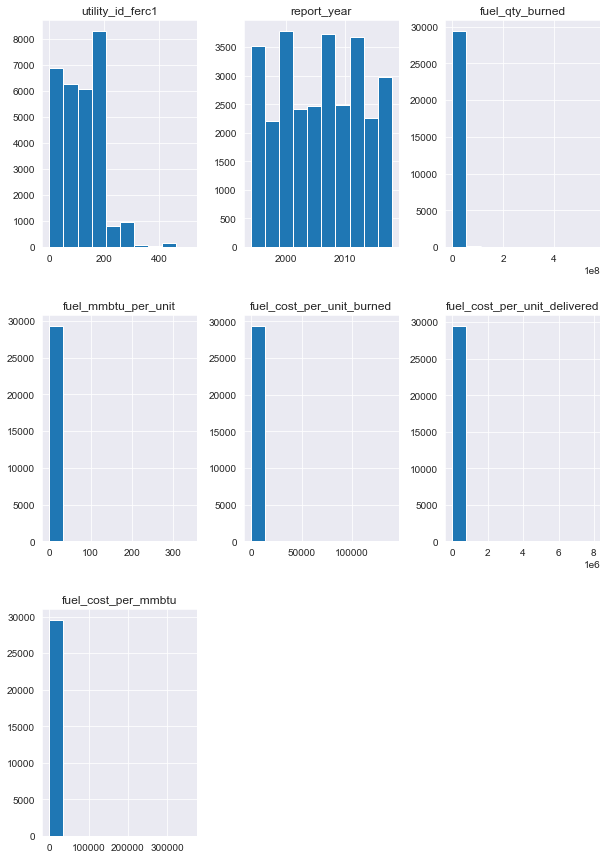

In [131]:
# plot the numerical variables
fuel_data.hist(figsize=(10,15),bins =10)

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='count'>

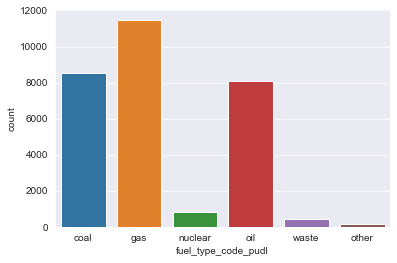

In [132]:
sns.countplot(data= fuel_data, x= 'fuel_type_code_pudl')

<AxesSubplot:xlabel='fuel_unit', ylabel='count'>

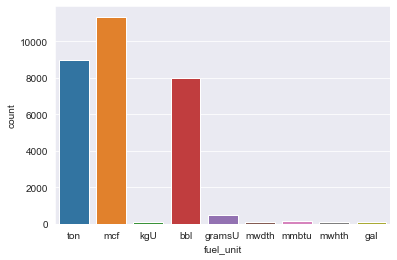

In [133]:
sns.countplot(data= fuel_data, x= 'fuel_unit')

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='utility_id_ferc1'>

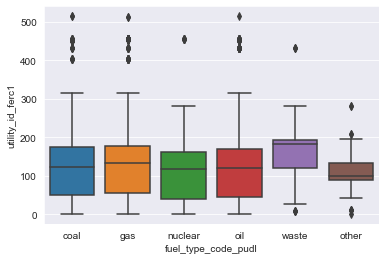

In [134]:
sns.boxplot(x='fuel_type_code_pudl',y = 'utility_id_ferc1', data = fuel_data)

<AxesSubplot:xlabel='report_year'>

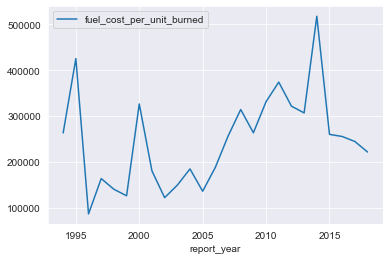

In [135]:
fuel_data[['report_year','fuel_cost_per_unit_burned']].groupby('report_year').sum().plot()

In [136]:
fuel_data.fuel_type_code_pudl.value_counts().index

Index(['gas', 'coal', 'oil', 'nuclear', 'waste', 'other'], dtype='object')

### Plot showing each fuel quantity burned over the years

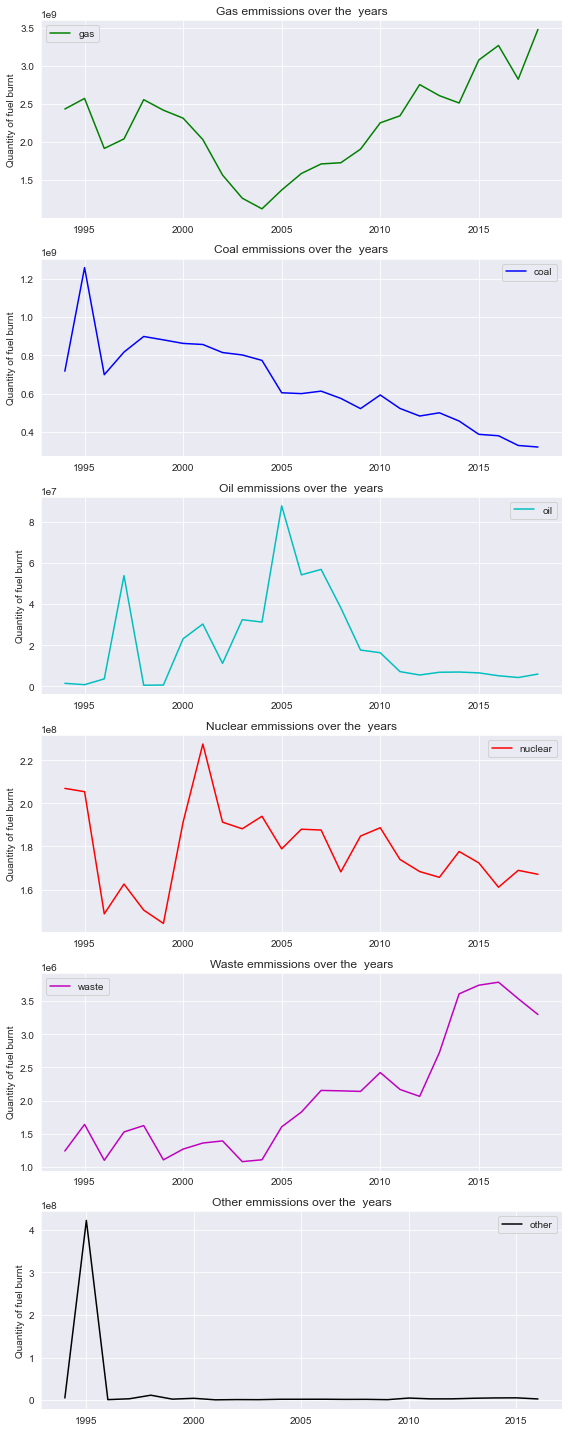

In [137]:
sns.set_style('darkgrid')
df = fuel_data[['report_year','fuel_type_code_pudl','fuel_qty_burned']].groupby(['report_year', 'fuel_type_code_pudl']).sum()
df.reset_index(inplace= True)
fig, axes = plt.subplots(fuel_data.fuel_type_code_pudl.nunique(),1,figsize=(8,20))
fuel_data_type = ['gas', 'coal', 'oil', 'nuclear', 'waste', 'other']
for data, subplot,color in zip(fuel_data_type, axes, ['g', 'b', 'c', 'r', 'm', 'k']):
    x = df[df['fuel_type_code_pudl'] == data]['report_year']
    y = df[df['fuel_type_code_pudl'] == data]['fuel_qty_burned']
    subplot.plot(x, y, color = color, label = data)
    subplot.set_title(f'{data.title()} emmissions over the  years')
    subplot.set_ylabel('Quantity of fuel burnt')
    subplot.legend()
plt.tight_layout()

<AxesSubplot:xlabel='report_year', ylabel='fuel_qty_burned'>

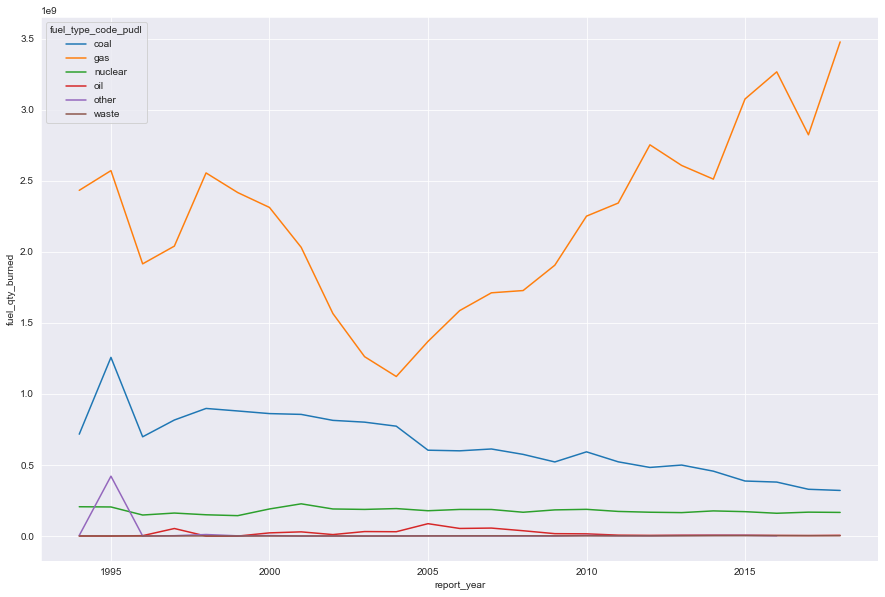

In [138]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
sns.lineplot(data=df,x= 'report_year',y = 'fuel_qty_burned', hue = 'fuel_type_code_pudl')

### Quiz Solutions with workings

In [139]:
A = [1,2,3,4,5,6] 
B = [13, 21, 34]

print(A+B)
print(A.extend(B))
print(A.append(B))

[1, 2, 3, 4, 5, 6, 13, 21, 34]
None
None


In [140]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [141]:
fuel_data[['fuel_type_code_pudl','fuel_cost_per_unit_burned']].groupby('fuel_type_code_pudl').mean().sort_values(ascending= True, by ='fuel_cost_per_unit_burned')

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
gas,13.659397
other,18.253856
waste,19.518122
coal,67.421830
oil,168.877086
nuclear,4955.157002


In [142]:
print(fuel_data['fuel_mmbtu_per_unit'].std())
print(np.percentile(fuel_data['fuel_mmbtu_per_unit'], q = 75))

10.600220307806886
17.006


In [143]:
# Skewness of the numerical data
# Kurtosis of numerical data
skew = []
kurt = []
symmetry = []
normal_data = []
skewed_num_data = []
for col in num_features.columns:
    x=num_features[col].skew()
    y = num_features[col].kurt()
    skew.append(x)
    kurt.append(y)
    if x < -0.5:
        symmetry.append('Left Skewed')
        skewed_num_data.append(col)
    elif x > 0.5:
        symmetry.append('Right Skewed')
        skewed_num_data.append(col)
    else:
        symmetry.append('Approximate Symmetry')
        normal_data.append(col)
pd.DataFrame({'Skew':skew, 'Kurtosis': kurt, 'Symmetry':symmetry}, index = num_cols ).loc['fuel_qty_burned', : ]

Skew             15.8515
Kurtosis         651.369
Symmetry    Right Skewed
Name: fuel_qty_burned, dtype: object

In [144]:
mssn_value = pd.DataFrame(round((fuel_data.isnull().sum()/fuel_data.shape[0])*100, 2),columns=['Percent_missing_value'])
mssn_value[mssn_value['Percent_missing_value']!= 0]

,Percent_missing_value
fuel_unit,0.61


In [145]:
fuel_data.corr()['fuel_cost_per_unit_burned'].sort_values(ascending = False)

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

In [146]:
new_df =fuel_data[['report_year','fuel_cost_per_unit_burned']].groupby('report_year').sum()
new_df.loc[1998,:]
(new_df.loc[1998,:] - new_df.loc[1994,:])/new_df.loc[1994,:]

fuel_cost_per_unit_burned   -0.467365
dtype: float64

In [147]:
fuel_data[['report_year','fuel_cost_per_unit_delivered']].groupby('report_year').mean().sort_values(ascending= False, by ='fuel_cost_per_unit_delivered')

,fuel_cost_per_unit_delivered
report_year,
1997,11140.197239
1996,9196.705948
2000,985.362877
2009,652.694163
2018,499.269966
2015,326.535511
1998,287.154420
2014,192.737183
2013,172.307591
